In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [ ]:
cd Mecab-ko-for-Google-Colab/

/content/Mecab-ko-for-Google-Colab


In [ ]:
!bash install_mecab-ko_on_colab190912.sh
# !apt-get update 
# !apt-get install g++ openjdk-8-jdk 
# !pip install konlpy JPype1-py3 
# !bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
!pip install top2vec
!pip install umap-learn[plot]
!pip install pororo
!pip install jamo

## Import modules 

In [ ]:
import json
import requests
import numpy as np

import umap
import umap.plot
import hdbscan

from jamo import h2j, j2hcj 
from pororo import Pororo
from top2vec import Top2Vec
from konlpy.tag import Mecab

from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer

[Korean Sentence Splitter]: Initializing Kss...


In [ ]:
def get_jongsung_TF(sample_text): 
    sample_text_list = list(sample_text) 
    last_word = sample_text_list[-1] 
    last_word_jamo_list = list(j2hcj(h2j(last_word))) 
    last_jamo = last_word_jamo_list[-1] 
    
    jongsung_TF = "T" 
    
    if last_jamo in ['ㅏ', 'ㅑ', 'ㅓ', 'ㅕ', 'ㅗ', 'ㅛ', 'ㅜ', 'ㅠ', 'ㅡ', 'ㅣ', 'ㅘ', 'ㅚ', 'ㅙ', 'ㅝ', 'ㅞ', 'ㅢ', 'ㅐ,ㅔ', 'ㅟ', 'ㅖ', 'ㅒ']: 
        jongsung_TF = "F" 
    
    return jongsung_TF

In [ ]:
cd /content/mecab-ko-dic-2.1.1-20180720

/content/mecab-ko-dic-2.1.1-20180720


In [ ]:
with open("./user-dic/nnp.csv", 'r', encoding='utf-8') as f: 
    file_data = f.readlines() 
    
word_list = ['오징어게임','오징어 게임','넷플릭스','넷플릭스','플릭스 패트롤'] 
for word in word_list: 
    jongsung_TF = get_jongsung_TF(word) 
    
    line = '{},,,,NNP,*,{},{},*,*,*,*,*\n'.format(word, jongsung_TF, word) 
    
    file_data.append(line)

with open("./user-dic/nnp.csv", 'w', encoding='utf-8') as f: 
    for line in file_data: 
        f.write(line)

with open("./user-dic/nnp.csv", 'r', encoding='utf-8') as f: 
    file_new = f.readlines()
file_new

['대우,,,,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,,,,NNP,*,T,구글,*,*,*,*,*\n',
 '오징어게임,,,,NNP,*,T,오징어게임,*,*,*,*,*\n',
 '넷플릭스,,,,NNP,*,F,넷플릭스,*,*,*,*,*\n',
 '오징어게임,,,,NNP,*,T,오징어게임,*,*,*,*,*\n',
 '오징어 게임,,,,NNP,*,T,오징어 게임,*,*,*,*,*\n',
 '넷플릭스,,,,NNP,*,F,넷플릭스,*,*,*,*,*\n',
 '넷플릭스,,,,NNP,*,F,넷플릭스,*,*,*,*,*\n',
 '플릭스 패트롤,,,,NNP,*,T,플릭스 패트롤,*,*,*,*,*\n']

## 뉴스검색 API

In [ ]:
            "from": "2019-09-02",
            "until": "2021-10-06"

In [ ]:
url = 'http://tools.kinds.or.kr:8888/search/news'

datas = {
    "access_key": "9af2f705-2974-4340-8b55-d69040b944ab",

    "argument": {
        "query": {"title": ""},
        "published_at": {
            "from": "2019-09-02",
            "until": "2020-01-20"
        },
        "provider": ["조선일보","동아일보","YTN","서울경제","한국경제","아시아경제"],
        "category": ["008004000"],
        "category_incident": [""],
        "byline": "",
        "provider_subject": [""],
        "subject_info": [""],
        "subject_info1": [""],
        "subject_info2": [""],
        "subject_info3": [""],
        "subject_info4": [""],
        "sort": {"date": "asc"},
        "hilight": 200,
        "return_from": 0,
        "return_size": 10000,
        "fields": [
            "byline",
            "category",
            "category_incident",
            "provider_news_id",
            "hilight",
        ]
    }
}

response = requests.post(url, data=json.dumps(datas))
res1 = response.json()

In [ ]:
total_hits1 = res1['return_object']['total_hits']
print("결과 개수:",total_hits)

결과 개수: 9962


In [ ]:
url = 'http://tools.kinds.or.kr:8888/search/news'

datas = {
    "access_key": "9af2f705-2974-4340-8b55-d69040b944ab",

    "argument": {
        "query": {"title": ""},
        "published_at": {
            "from": "2020-01-20",
            "until": "2020-05-20"
        },
        "provider": ["조선일보","동아일보","YTN","서울경제","한국경제","아시아경제"],
        "category": ["008004000"],
        "category_incident": [""],
        "byline": "",
        "provider_subject": [""],
        "subject_info": [""],
        "subject_info1": [""],
        "subject_info2": [""],
        "subject_info3": [""],
        "subject_info4": [""],
        "sort": {"date": "asc"},
        "hilight": 200,
        "return_from": 0,
        "return_size": 10000,
        "fields": [
            "byline",
            "category",
            "category_incident",
            "provider_news_id",
            "hilight",
        ]
    }
}

response = requests.post(url, data=json.dumps(datas))
res2 = response.json()

In [ ]:
total_hits2 = res2['return_object']['total_hits']
print("결과 개수:",total_hits)

결과 개수: 9962


In [ ]:
url = 'http://tools.kinds.or.kr:8888/search/news'

datas = {
    "access_key": "9af2f705-2974-4340-8b55-d69040b944ab",

    "argument": {
        "query": {"title": ""},
        "published_at": {
            "from": "2020-05-20",
            "until": "2020-09-15"
        },
        "provider": ["조선일보","동아일보","YTN","서울경제","한국경제","아시아경제"],
        "category": ["008004000"],
        "category_incident": [""],
        "byline": "",
        "provider_subject": [""],
        "subject_info": [""],
        "subject_info1": [""],
        "subject_info2": [""],
        "subject_info3": [""],
        "subject_info4": [""],
        "sort": {"date": "asc"},
        "hilight": 200,
        "return_from": 0,
        "return_size": 10000,
        "fields": [
            "byline",
            "category",
            "category_incident",
            "provider_news_id",
            "hilight",
        ]
    }
}

response = requests.post(url, data=json.dumps(datas))
res3 = response.json()

In [ ]:
total_hits3 = res3['return_object']['total_hits']
print("결과 개수:",total_hits)

결과 개수: 9962


In [ ]:
url = 'http://tools.kinds.or.kr:8888/search/news'

datas = {
    "access_key": "9af2f705-2974-4340-8b55-d69040b944ab",

    "argument": {
        "query": {"title": ""},
        "published_at": {
            "from": "2020-09-15",
            "until": "2021-01-20"
        },
        "provider": ["조선일보","동아일보","YTN","서울경제","한국경제","아시아경제"],
        "category": ["008004000"],
        "category_incident": [""],
        "byline": "",
        "provider_subject": [""],
        "subject_info": [""],
        "subject_info1": [""],
        "subject_info2": [""],
        "subject_info3": [""],
        "subject_info4": [""],
        "sort": {"date": "asc"},
        "hilight": 200,
        "return_from": 0,
        "return_size": 10000,
        "fields": [
            "byline",
            "category",
            "category_incident",
            "provider_news_id",
            "hilight",
        ]
    }
}

response = requests.post(url, data=json.dumps(datas))
res4 = response.json()

In [ ]:
total_hits4 = res4['return_object']['total_hits']
print("결과 개수:",total_hits)

결과 개수: 9962


In [ ]:
url = 'http://tools.kinds.or.kr:8888/search/news'

datas = {
    "access_key": "9af2f705-2974-4340-8b55-d69040b944ab",

    "argument": {
        "query": {"title": ""},
        "published_at": {
            "from": "2021-01-20",
            "until": "2021-06-01"
        },
        "provider": ["조선일보","동아일보","YTN","서울경제","한국경제","아시아경제"],
        "category": ["008004000"],
        "category_incident": [""],
        "byline": "",
        "provider_subject": [""],
        "subject_info": [""],
        "subject_info1": [""],
        "subject_info2": [""],
        "subject_info3": [""],
        "subject_info4": [""],
        "sort": {"date": "asc"},
        "hilight": 200,
        "return_from": 0,
        "return_size": 10000,
        "fields": [
            "byline",
            "category",
            "category_incident",
            "provider_news_id",
            "hilight",
        ]
    }
}

response = requests.post(url, data=json.dumps(datas))
res5 = response.json()

In [ ]:
total_hits5 = res5['return_object']['total_hits']
print("결과 개수:",total_hits)

결과 개수: 9962


In [ ]:
url = 'http://tools.kinds.or.kr:8888/search/news'

datas = {
    "access_key": "9af2f705-2974-4340-8b55-d69040b944ab",

    "argument": {
        "query": {"title": ""},
        "published_at": {
            "from": "2021-06-01",
            "until": "2021-10-05"
        },
        "provider": ["조선일보","동아일보","YTN","서울경제","한국경제","아시아경제"],
        "category": ["008004000"],
        "category_incident": [""],
        "byline": "",
        "provider_subject": [""],
        "subject_info": [""],
        "subject_info1": [""],
        "subject_info2": [""],
        "subject_info3": [""],
        "subject_info4": [""],
        "sort": {"date": "asc"},
        "hilight": 200,
        "return_from": 0,
        "return_size": 10000,
        "fields": [
            "byline",
            "category",
            "category_incident",
            "provider_news_id",
            "hilight",
        ]
    }
}

response = requests.post(url, data=json.dumps(datas))
res6 = response.json()

In [ ]:
total_hits6 = res6['return_object']['total_hits']
print("결과 개수:",total_hits)

결과 개수: 9962


In [ ]:
total_hits = res['return_object']['total_hits']
print("결과 개수:",total_hits)

결과 개수: 9855


## 전처리

In [ ]:
# 전처리
import re
import kss

def sentence_tokenize(line):
    sentence_tokenized_text = []
    for sent in kss.split_sentences(line):
        sentence_tokenized_text.append(sent.strip())
    return sentence_tokenized_text


def clean_punc(text, punct, mapping):
    for p in mapping:
        text = text.replace(p, mapping[p])
    
    for p in punct:
        text = text.replace(p, f' {p} ')
    
    specials = {'\u200b': ' ', '…': ' ... ', '\ufeff': '', 'करना': '', 'है': ''}
    for s in specials:
        text = text.replace(s, specials[s])
    
    return text.strip()


def clean_text(texts):
    corpus = []
    for i in range(0, len(texts)):
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts[i])) #remove punctuation
        review = review.lower() #lower case
        review = re.sub(r'\s+', ' ', review) #remove extra space
        review = re.sub(r'<[^>]+>','',review) #remove Html tags
        review = re.sub(r'\s+', ' ', review) #remove extra space
        review = re.sub(r"^\s+", '', review) #remove space from start
        review = re.sub(r'\s+$', '', review) #remove space from the end
        corpus.append(review)
    return corpus[0]

def execute_cleaner(line):
    if line is None:
        line = " "
    punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
    punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-", "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', }

    cleaned_corpus = []
    for sent in sentence_tokenize(line):
            cleaned_corpus.append(clean_punc(sent, punct, punct_mapping))
    
    basic_preprocessed_corpus = clean_text(cleaned_corpus)
    if basic_preprocessed_corpus[0]:
        return basic_preprocessed_corpus[0]
    else:
        return " "


## 클러스터링 코퍼스 생성

In [ ]:
# api데이터로 코퍼스 생성
def create_corpus(res,total_hits):
    global news_ids
    news_ids, titles, hilights ,title_plus_hilights = [], [], [],[]

    sentence_tokenized_text = []

    for i in range(total_hits):
        title = res['return_object']['documents'][i]['title']
        #print(title)
        # if "　" in title:
        #     title = title.replace("　", " ")
        # title 전처리
        #title = clean_text(title)
        #print("cleaned",title)
        
        hilight = res['return_object']['documents'][i]['hilight']
        #print(hilight)
        # if "　" in hilight:
        #     hilight = hilight.replace("　", " ")
        # hilight 전처리
        #hilight = clean_text(hilight)
        #print("cleaned",hilight)
        #print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")


        news_id = res['return_object']['documents'][i]['news_id']
        news_ids.append(news_id)
        title_plus_hilight = title +","+ hilight
        title_plus_hilights.append(title_plus_hilight)
    len(title_plus_hilights)

    return title_plus_hilights

In [ ]:
total_corpus = create_corpus(res1,total_hits1) + create_corpus(res2,total_hits2) + create_corpus(res3,total_hits3) + create_corpus(res4,total_hits4) + create_corpus(res5,total_hits5) + create_corpus(res6,total_hits6)
# create_corpus(res1,total_hits1)
# total_corpus.append(create_corpus(res2,total_hits2))
# total_corpus.append(create_corpus(res3,total_hits3))
# total_corpus.append(create_corpus(res4,total_hits4))
# total_corpus.append(create_corpus(res5,total_hits5))
# total_corpus.append(create_corpus(res6,total_hits6))


'[디지털 이코노미] 플랫폼 비즈는 기술 아닌 시장구조의 변화,[디지털 이코노미] 플랫폼 비즈는 기술 아닌 시장구조의 변화 하드웨어 시대가 가고 소프트웨어 세상이 온 줄로만 알았다... 넷스케이프 설립자인 마크 앤드리슨은 2011년 월스트리트저널 기고를 통해 소프트웨어 기업들이 전체 경제의 많은 부분을 차지하는 기술적·경제적 전환기를 보내고 있다고 강조했다... 이를 뒷받침하기 위해 새로운 소프트웨어 경제를 선도하..'

In [ ]:
mecab = Mecab()

## Top2Vec 임베딩

In [ ]:
# 모델 초기화
model = 0
model = Top2Vec(documents = create_corpus(res6,total_hits6), 
                tokenizer = mecab.morphs,

                umap_args = {'n_neighbors': 15, 
                             'n_components': 5, 
                             'metric': 'cosine', 
                             "random_state": 42},
                
                hdbscan_args = {'min_cluster_size': 15,
                                'metric': 'euclidean',
                                'cluster_selection_method': 'eom'})

2021-10-10 19:14:20,202 - top2vec - INFO - Pre-processing documents for training
[Korean Sentence Splitter]: Pre-processing documents for training
2021-10-10 19:14:26,044 - top2vec - INFO - Creating joint document/word embedding
[Korean Sentence Splitter]: Creating joint document/word embedding
2021-10-10 19:16:07,658 - top2vec - INFO - Creating lower dimension embedding of documents
[Korean Sentence Splitter]: Creating lower dimension embedding of documents
2021-10-10 19:16:42,253 - top2vec - INFO - Finding dense areas of documents
[Korean Sentence Splitter]: Finding dense areas of documents
2021-10-10 19:16:42,721 - top2vec - INFO - Finding topics
[Korean Sentence Splitter]: Finding topics


## 클러스터링 시각화

In [ ]:
umap_args = {'n_neighbors': 15,
             'n_components': 2,
             'metric': 'cosine'}

mapper = umap.UMAP(**umap_args).fit(model._get_document_vectors(norm=False))

[Korean Sentence Splitter]: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


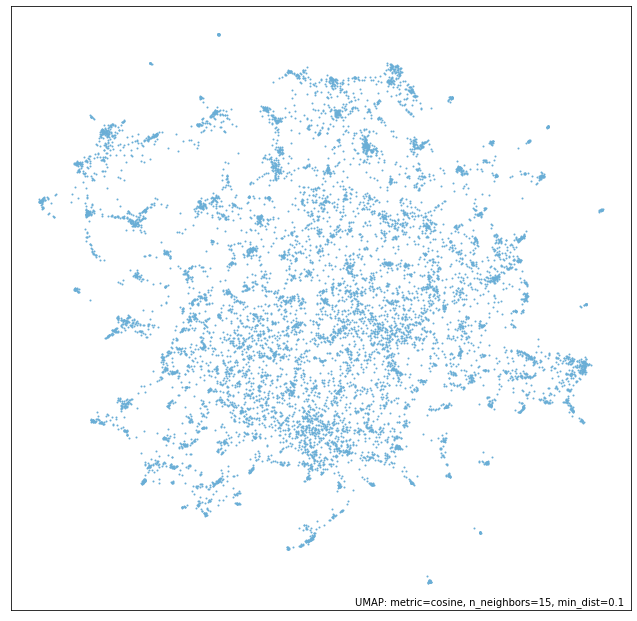

In [ ]:
# https://umap-learn.readthedocs.io/en/latest/clustering.html
umap.plot.points(mapper,)


In [ ]:
hdbscan_args = {'min_cluster_size': 15,
                'metric': 'cosine',
                'cluster_selection_method': 'eom'}

cluster = hdbscan.HDBSCAN(**hdbscan_args).fit(mapper.embedding_)

ValueError: ignored

In [ ]:
cluster.labels_


array([113, 117,  41, ..., 109,  98, 115])

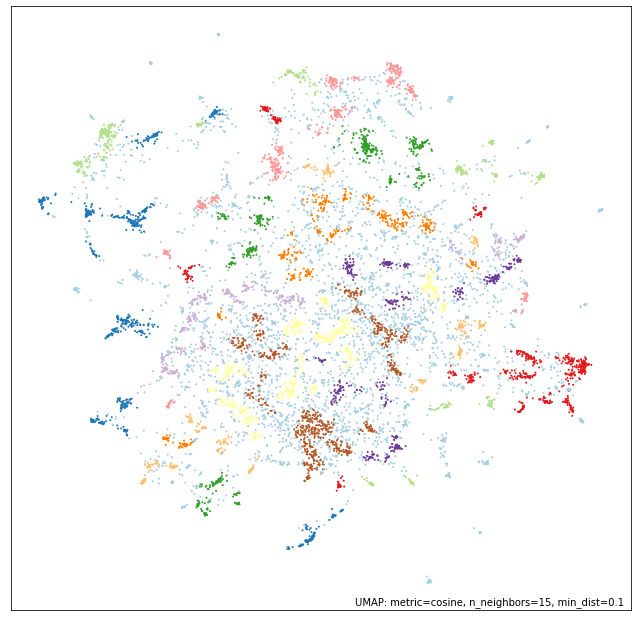

In [ ]:
# https://github.com/ddangelov/Top2Vec/blob/master/top2vec/Top2Vec.py
# line 376
#
# https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html
umap.plot.points(mapper,cluster.labels_, color_key_cmap='Paired',show_legend=False)

* 토픽 개수

In [ ]:
model.get_num_topics()

734

* 각 토픽들 크기

In [ ]:
topic_sizes, topic_nums = model.get_topic_sizes()
topic_sizes

array([853, 816, 775, 533, 479, 459, 400, 352, 328, 326, 323, 301, 289,
       286, 282, 280, 272, 270, 267, 266, 266, 252, 252, 248, 242, 238,
       231, 230, 227, 224, 224, 218, 211, 207, 205, 204, 200, 198, 198,
       197, 195, 194, 186, 182, 177, 172, 172, 170, 170, 170, 169, 168,
       167, 166, 164, 163, 163, 162, 161, 156, 155, 154, 152, 151, 150,
       147, 147, 145, 145, 145, 144, 143, 143, 142, 141, 140, 140, 137,
       137, 136, 136, 135, 134, 133, 132, 132, 131, 131, 131, 130, 130,
       129, 129, 128, 127, 124, 124, 124, 123, 122, 122, 121, 121, 120,
       119, 119, 118, 118, 118, 117, 117, 117, 116, 116, 116, 115, 115,
       115, 115, 115, 115, 115, 115, 115, 114, 114, 114, 114, 114, 113,
       113, 113, 113, 112, 111, 111, 110, 110, 110, 110, 109, 108, 108,
       108, 107, 107, 106, 106, 106, 106, 106, 106, 105, 105, 104, 104,
       104, 104, 103, 103, 102, 102, 102, 101, 101, 100, 100, 100,  99,
        99,  98,  98,  98,  98,  98,  98,  98,  98,  98,  97,  9

* 키워드와 유사한 군집 검색

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=['플릭스'], num_topics=len(topic_sizes))
print(topic_nums[:5])
print(topic_scores[:5])
tpn = topic_nums[0]
ndc = topic_sizes[topic_nums[0]]

[146 579 444 229 252]
[0.52363432 0.40278775 0.33306124 0.33106891 0.28538612]


* 군집 키워드 추출

In [ ]:
topic_words, word_scores, topic_nums = model.get_topics()
topic_words[146]

array(['오징어', '플릭스', '넷플릭스', '드라마', '오리지널', '올랐', '차지', '주연', '돌풍', '작품',
       '일으키', '이정재', '순위', '집계', '정호연', '등극', '신드롬', '기생충', '방영', '감독',
       '석권', '456', '영화', 'OTT', '83', '점령', '인기', '랭킹', '개국', '위', '흥행',
       '극장', '목숨', '차트', '리호', '배우', '지옥', '시리즈', '휩쓸', '개봉', '사로잡', '극',
       '미국', '전', '제치', '서프라이즈', '기록', '거두', '빌보드', '언급'], dtype='<U14')

In [ ]:
topic_words[229]

array(['Seezn', '시즌', 'OTT', '오리지널', '동영상', '지상파', 'VOD', 'KT', '웨이브',
       'tv', '030200', '영화', '올레', '골라', '극장', '감상', '개봉', '드라마', '티빙',
       '편', 'IPTV', '워너', '취향', '구채', '예능', '기분', '다큐', '즐길', '스트리밍',
       '작품', '넷플릭스', '방영', '볼', '음악', '아이돌', 'HBO', '초고', '화질', '셋톱박스',
       '큐레이션', 'TV', 'Btv', '특집', '영화관', '시청', '정액', '싱어', '젝스키스', '히든',
       '투게더'], dtype='<U14')

In [ ]:
topic_words[444]

array(['피자', '도미노피자', '호수', '배달', '조차', '공원', '드론', '치킨', '외식업', '푸드',
       '맛', '주문', '비행', '편식', '입소문', '먹', '1990', '프랜차이즈', '식사', '외식',
       '메뉴', '문혜원', '도시락', '꽉', '파리바', '시연', '스톡', '음식', '앞장서', '리치',
       '조선일보', '한계', '상용', '밥', '접수', '식당', '수제', '찜', '교통부', '재료', '그동안',
       '보내', 'HOT', '오븐', '세종', '먹거리', '갔', '출산', '새해', '브라우저'],
      dtype='<U14')

* 군집 내부 기사

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=tpn, num_docs=ndc)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    if score >= 0.4:
        print(f"Document: {doc_id}, Score: {score}")
        print("-----------")
        print(doc)
        print("-----------")
        print()

Document: 58252, Score: 0.8814321160316467
-----------
'오징어 게임' 한국 드라마 최초 전 세계 넷플릭스 1위,'오징어 게임' 한국 드라마 최초 전 세계 넷플릭스 1위 넷플릭스 오리지널 시리즈 ..'오징어 게임'(감독 황동혁)이 한국 드라마 최초로 전 세계 넷플릭스 1위를 차지했다. .. ..24일(현지 시간) 글로벌 온라인 동영상 서비스(OTT) 순위 집계 사이트 플릭스 패트롤에 따르면 오징어게임이 ..'넷플릭스 인기 TV 프로그램 톱10' 세계 1위로 올랐다..
-----------

Document: 58238, Score: 0.8673934936523438
-----------
‘오징어게임’, 전세계 넷플릭스 1위 올랐다... 한국 드라마 최초,‘오징어게임’, 전세계 넷플릭스 1위 올랐다..... 한국 드라마 최초 넷플릭스 오리지널 시리즈 ..‘오징어 게임’이 국내 드라마 최초로 전 세계 넷플릭스 1위를 차지했다... .. .. .. ..플릭스패트롤에 따르면, 지난 17일 공개된 넷플릭스 오리지널 시리즈 ..‘오징어 게임’은 24일(현지시각) 전체 순위 1위를 차지했다... 2위는 ..‘오티스..
-----------

Document: 58242, Score: 0.850799560546875
-----------
글로벌 열풍…'오징어게임' 전세계 넷플릭스 드라마 1위,글로벌 열풍…'오징어게임' 전세계 넷플릭스 드라마 1위 국내외에서 엄청난 인기를 끌고 있는 넷플릭스 오리지널 시리즈 ..‘오징어 게임’이 한국 드라마 최초로 전 세계 넷플릭스 1위를 올랐다... .. .. .. ..24일(현지 시간) 플릭스패트롤에 따르면 지난 17일 공개된 넷플릭스 오리지널 시리즈 오징어 게임은 전체 순위 1위를 차지했다... 2위는 ..
-----------

Document: 58013, Score: 0.8488861918449402
-----------
'오징어 게임' 한국 드라마 최초 美 넷플릭스 1위… 전 세계 돌풍,

* 특성추출

In [ ]:
def keyword_extract(doc):
    url = 'http://tools.kinds.or.kr:8888/feature'

    datas = {
        "access_key": "9af2f705-2974-4340-8b55-d69040b944ab",
        "argument": {
            "title": "", 
            "sub_title": "", 
            "content": 
            f"""
            {doc}
            """
            }
    }

    response = requests.post(url, data=json.dumps(datas))
    my_list = response.json()['return_object']['result']['content'].split()
    return [
        i.split("|")[0].replace("_", "")
        for i in my_list
        if float(i.split("|")[1]) > 0.04
    ]

In [ ]:
def create_cluster_data(topic_n, score, numdocs):
    topic_words, word_scores, topic_nums = model.get_topics()
    clusters = {
    '000001':{'cluster_name': "오징어게임",'cluster_tag': list(topic_words[topic_n]),'articles':[]},
}

    articles = []
    topic_words, word_scores, topic_nums = model.get_topics()
    top_ten = list(topic_words[topic_n][:11])

    documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=topic_n, num_docs=numdocs)
    for doc, score, doc_id in zip(documents, document_scores, document_ids):
        if score >= 0.4:
            temp = []
            article_keyword=keyword_extract(doc)
            x = article_keyword + top_ten
            x = list(set(x))
            #articles = {'news_id':news_ids[doc_id],'tag':x,'doc':doc,'score':str(score)}
            articles = {'tag':x,'doc':doc,'score':str(score)}
            
            clusters['000001']['articles'].append(articles)

    return clusters

In [ ]:
json_data = create_cluster_data(topic_n = tpn, score = 0.4, numdocs = ndc)

## Tf-idf 를 통한 시점 분리
* tf-idf 벡터화 (tokenizer mecab 사용)

In [ ]:
article_nums = list(range(len(json_data['000001']['articles'])))
corpus = [json_data['000001']['articles'][i]['doc'] for i in article_nums]
tfidfv = TfidfVectorizer(tokenizer = mecab.morphs).fit_transform(corpus)
tfidfv.shape

(76, 913)

* tf-idf 행렬

In [ ]:
document_distances = (tfidfv * tfidfv.T)
document_distances.toarray()[0]

array([1.        , 0.67844312, 0.71631054, 0.72433275, 0.60748869,
       0.65081659, 0.75138256, 0.62777614, 0.55337016, 0.47659226,
       0.4321793 , 0.46867706, 0.57855535, 0.415656  , 0.61071009,
       0.47675497, 0.47049586, 0.55808231, 0.52320008, 0.54934679,
       0.45022782, 0.43980266, 0.59987137, 0.48392698, 0.37485781,
       0.49953657, 0.30349313, 0.33247649, 0.34084805, 0.27631807,
       0.34180979, 0.42509029, 0.46867416, 0.24556427, 0.39186628,
       0.23197082, 0.27886835, 0.24517769, 0.24842586, 0.34528593,
       0.3569893 , 0.3025125 , 0.24050777, 0.30364494, 0.25064981,
       0.28428569, 0.39497217, 0.29025121, 0.30298511, 0.17794267,
       0.39722774, 0.27936242, 0.32248346, 0.29290102, 0.2826893 ,
       0.18756471, 0.21303774, 0.28263858, 0.13820658, 0.1948496 ,
       0.15145687, 0.19411569, 0.18791758, 0.24607278, 0.2828933 ,
       0.22109884, 0.11331877, 0.19522029, 0.2828933 , 0.3082914 ,
       0.15235364, 0.37562417, 0.14642722, 0.16651922, 0.17487

* tf-idf 기준 유사도로 시점 군집화 -> 인덱스 반환

In [ ]:
import copy

full_indices_set = set(article_nums)
clustered_indices = []
target = 0
remain_indices = full_indices_set.copy()

while True:
    similarities = document_distances.toarray()[target]
    sim_doc_indices = [i for i, score in enumerate(similarities) if score > 0.2]
    sim_doc_indices = set.intersection(set(sim_doc_indices), remain_indices)
    # sim_doc_list = [json_data['000001']['articles'][i]['doc'] for i in sim_doc_indices]
    clustered_indices.append(sorted(list(sim_doc_indices)))

    remain_indices = remain_indices - set(sim_doc_indices)
    if len(list(remain_indices)) == 0:
        break

    target = list(remain_indices)[0]
    #print(target)
print(len(clustered_indices),"시점")

10 시점


- 유사 기사 군집 별 첫 기사 반환
-> 군집 별 대표 기사 선정 알고리즘 (기사 신뢰도 측정 모델)

In [ ]:
for indices in clustered_indices:
    idx = indices[0]
    print(idx, ':', corpus[idx])
    print('-'*200)

0 : '오징어 게임' 한국 드라마 최초 전 세계 넷플릭스 1위,'오징어 게임' 한국 드라마 최초 전 세계 넷플릭스 1위 넷플릭스 오리지널 시리즈 ..'오징어 게임'(감독 황동혁)이 한국 드라마 최초로 전 세계 넷플릭스 1위를 차지했다. .. ..24일(현지 시간) 글로벌 온라인 동영상 서비스(OTT) 순위 집계 사이트 플릭스 패트롤에 따르면 오징어게임이 ..'넷플릭스 인기 TV 프로그램 톱10' 세계 1위로 올랐다..
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
59 : '돈플릭스' 정형돈, 성덕 등극?… '서프라이즈' 촬영장 방문→김하영 만남,'돈플릭스' 정형돈, 성덕 등극?… ..'서프라이즈' 촬영장 방문→김하영 만남 MBC 디지털 채널 ..‘M드로메다’의 첫 웹예능 ..‘돈플릭스’가 오늘(12일) 낮 12시 드디어 베일을 벗는다... .. .. .. ..오늘(12일) ..‘돈플릭스’의 첫 번째 에피소드 공개를 앞두고, 제작진 측이 ..‘신비한 TV 서프라이즈’(이하 ..‘서프라이즈’)의 ..
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
49 : 좀비·로코도 핫하네…해외 '집콕족' 사로잡은 K콘텐츠,좀비·로코도 핫하네…해외 ..'집콕족' 사로잡은 K콘텐츠 미국 주간지 옵서버가 지난달 발표한 ..‘넷플릭스에서 가장 많이 재생된 콘텐츠 톱 

- 인덱스로 id 및 date 반환
- 각 대표 기사의 date_list sort

In [ ]:
date_ls = []
date2doc = {}
for indices in clustered_indices:
    idx = indices[0]
    date = json_data['000001']['articles'][idx]['news_id'][9:]
    doc = json_data['000001']['articles'][idx]['doc']

    date_ls.append(date)
    date2doc[date] = doc
date_ls = sorted(date_ls)

KeyError: ignored

## Timeline

In [ ]:
for date in date_ls:
    print(date, ':', date2doc[date])
    print('-'*200)

In [ ]:
summ = Pororo(task="summarization", model="extractive", lang="ko")
sts = Pororo(task="similarity", lang="ko")

In [ ]:
timeline_corpus = []

for date in date_ls:
    timeline_corpus.append(date2doc[date])

timeline_corpus = " ".join(timeline_corpus)
timeline_summary=summ(timeline_corpus)

In [ ]:
timeline_summary

"넷플리스 세계 2위 ‘오징어 게임’ 흥행에 10년 전 무한도전 재소환,넷플리스 세계 2위 ..‘오징어 게임’ 흥행에 10년 전 무한도전 재소환 국내 드라마 최초로 넷플릭스 세계 2위를 차지한 ..‘오징어 게임’이 흥행하면서 10년 전 방송된 예능 프로그램 ..‘무한도전’이 다시금 주목받고 있다... .. .. .. .. 21일 각종 온라인 커뮤니티에는 ..‘없는 게 없는 무한도전’이라며 오징어 게임과 유사한 내용의 무한도전.. 전세계가 푹 빠졌다…'오징어게임' 美 넷플릭스서 1위,전세계가 푹 빠졌다…'오징어게임' 美 넷플릭스서 1위 넷플릭스 오리지널 시리즈 ..'오징어 게임'이 전세계 넷플릭스 시리즈 인기 순위 2위에 오른 가운데 미국에서는 1위를 기록했다... .. .. .. .. 추석 연휴를 앞두고 17일 공개된 넷플릭스의 9부작 ..‘오징어 게임’이 K드라마로는 처음으로 미국 넷플릭스의 인기 프로그램 순위 1위에 올랐다... .. .."

In [ ]:
for date in date_ls:
    print(sts(timeline_summary, date2doc[date]))

0.892
0.761
0.748
0.764
0.783
0.717
0.744
0.664
0.68
0.749
0.743
0.743
0.731


In [ ]:
# 할일
# 오징어게임 연결

In [ ]:
# 새로운 방법 시도



# 방법 1

# api 쿼리로 집어넣어서 검색할 방법을 찾자 
# 주제별로 검색할수만 있다면 
# 클러스터링으로 시점 분리만 하면됨 ..
# topN 키워드를 활용?
# topN 키워드로 특정한 카테고리로 검색해서 
# 키워드 추출 
# 그러면 전화번호 유출 논란 같은것은 어떻게 찾아내지?


In [ ]:
mecab.pos("중국")




[('중국', 'NNP')]

In [ ]:
# 방법 2 
# 즉시 타임라인 제작
# 접근해 있는 기사를 바탕으로 클러스터링 후 타임라인 제작방법


In [ ]:
# 방법 3 
# 지금 하는 방법을 고도화